In [280]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [281]:
window_size = 1000
dataset_chosen = "AedesSex"
detectors = ["CDT", "IBDD", "IKS"]

In [282]:
test = pd.read_csv(f"datasets/test/{dataset_chosen}.test.csv")
labels = test["class"].tolist()

In [283]:
proportions = []
detector_info = {k:0 for k in detectors}

In [284]:
def plot_accuracy(classification:list, final_acc:list):
    for i in range(0, len(classification), window_size):
        mean_acc = accuracy_score(labels[i:i+window_size], classification[i:i+window_size])
        final_acc.append(mean_acc)
    
    return final_acc

In [285]:
def plot_proportions(proportions:list, final_prop):
    for i in range(0, len(proportions), window_size):
        mean_prop = np.mean(proportions[i:i+1])
        final_prop.append(mean_prop)
    
    return final_prop

In [286]:
for file in os.listdir(f"results/"):
    dataset, detector = file.split("_")
    if dataset == dataset_chosen:
        with open(f"results/{file}", "r") as f:
            d = json.load(f)
            if isinstance(d, dict):
                drifts_detected, drifts_detected_at, time, context_portion, classification = d.values()
    
                final_acc = plot_accuracy(classification, [])
                detector_info[detector.split(".")[0]] = final_acc
            else:
                proportions = d
                final_prop = plot_proportions(proportions, [])
    
    

C:\Users\Luiz Fernando\AppData\Local\Temp\ipykernel_8460\1285114275.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(np.arange(int(window_size/2), len(test), int(window_size/2)))


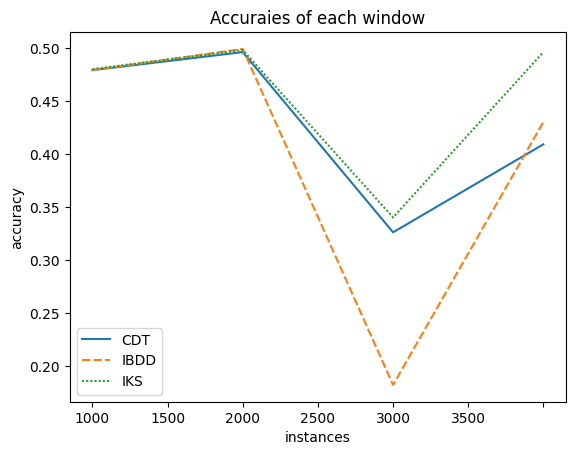

In [287]:
df = pd.DataFrame(detector_info)
fig = sns.lineplot(df)
fig.set_title("Accuraies of each window")
fig.set_xlabel("instances")
fig.set_ylabel("accuracy")
fig.set_xticklabels(np.arange(int(window_size/2), len(test), int(window_size/2)))
plt.show()

C:\Users\Luiz Fernando\AppData\Local\Temp\ipykernel_8460\1891657120.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  prop.set_xticklabels(np.arange(int(window_size/2), len(test), int(window_size/2)))


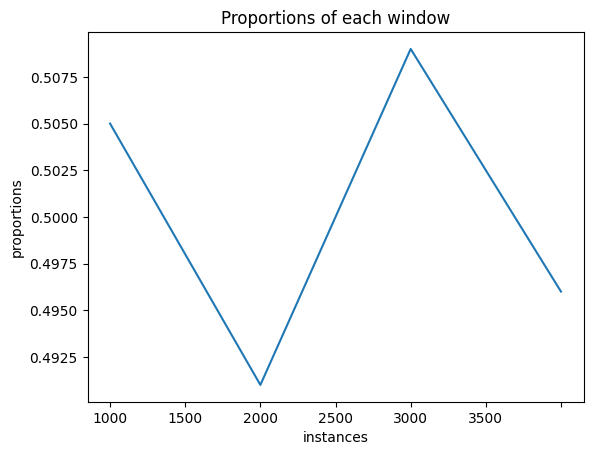

In [288]:
prop = sns.lineplot(final_prop)
prop.set_title("Proportions of each window")
prop.set_xlabel("instances")
prop.set_ylabel("proportions")
prop.set_xticklabels(np.arange(int(window_size/2), len(test), int(window_size/2)))
plt.show()